In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle
import pandas as pd
import random
%matplotlib inline


In [2]:
img = mpimg.imread('map.jpg')


In [3]:
def coord2px(lonlist, latlist):
    lat0 = 47.749748
    lon0 = -122.467063
    lat1 = 47.483141
    lon1 = -122.189658

    latpx_range = 1154
    lonpx_range = 810

    lonnp = np.array(lonlist)
    latnp = np.array(latlist)

    lonpxnp = ((lonnp - lon0)/(lon1 - lon0) * lonpx_range)
    latpxnp = ((latnp - lat0)/(lat1 - lat0) * latpx_range)

    lonpxlist = [int(lon) for lon in lonpxnp]
    latpxlist = [int(lat) for lat in latpxnp]
    return lonpxlist, latpxlist
    

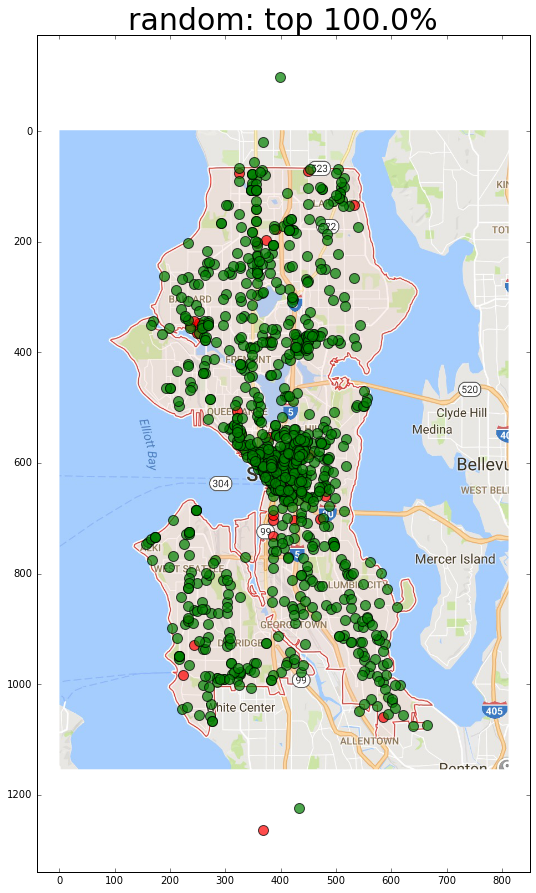

In [16]:
cutoff = 1.

with open('random.pkl', 'r') as f:
    random = pickle.load(f)
[rrow, rcol] = random.shape
random = random.iloc[0:int(rrow*cutoff),:]

vrandom = random[random['Violent'] == 1]
rvlon = vrandom['Longitude'].tolist()
rvlat = vrandom['Latitude'].tolist()
rvlon, rvlat = coord2px(rvlon, rvlat)

nrandom = random[random['Violent'] == 0]
rnlon = nrandom['Longitude'].tolist()
rnlat = nrandom['Latitude'].tolist()
rnlon, rnlat = coord2px(rnlon, rnlat)

img = mpimg.imread('map.jpg')
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.imshow(img)
ax.scatter(rvlon, rvlat, alpha= .7, s = 100, c = 'r')
ax.scatter(rnlon, rnlat, alpha= .7, s = 100, c = 'g')
ax.set_title('random: top ' + str(cutoff*100) + '%', fontsize = 30)


In [14]:
cutoff = 1

with open('gb_sorted.pkl', 'r') as f:
    gb_sorted = pickle.load(f)
[srow, scol] = gb_sorted.shape
gb_sorted = gb_sorted.iloc[0:int(srow*cutoff),:]

vsorted = gb_sorted[gb_sorted['Violent'] == 1]
svlon = vsorted['Longitude'].tolist()
svlat = vsorted['Latitude'].tolist()
svlon, svlat = coord2px(svlon, svlat)

nsorted = gb_sorted[gb_sorted['Violent'] == 0]
snlon = nsorted['Longitude'].tolist()
snlat = nsorted['Latitude'].tolist()
snlon, snlat = coord2px(snlon, snlat)



img = mpimg.imread('map.jpg')
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.imshow(img)
ax.scatter(svlon, svlat, alpha= .7, s = 100, c = 'r')
ax.scatter(snlon, snlat, alpha= .7, s = 100, c = 'g')
ax.set_title('sorted: top ' + str(cutoff*100) + '%', fontsize = 30)

NameError: name 'coord2px' is not defined

In [4]:
with open('rank_logit_all.pkl', 'r') as f:
    rank_logit_all = pickle.load(f)

rank_logit_all.columns = ['Violent', 'Proba']

In [5]:
with open('seattle911_probs.pkl', 'r') as f:
    seattle911 = pickle.load(f)

In [12]:
seattle911.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,...,Initial Type Subgroup,Initial Type Group,At Scene Time_dt,Violent,Scene_DayofWeek,Scene_Month,Scene_Day,Hour,PredictedProb,date
255,1658031,16000028114,201628114,161.0,TRESPASS,TRESPASS,TRESPASS,01/24/2016 11:59:45 AM,24XX BLOCK OF DEXTER AV N,D,...,MISCELLANEOUS MISDEMEANORS,MISCELLANEOUS MISDEMEANORS,2016-01-24 10:46:45,0,6.0,1.0,24.0,10,0.028985,2016-01-24
2146,1658050,16000028120,201628120,50.0,"BURGLARY - RESIDENTIAL, UNOCCUPIED",RESIDENTIAL BURGLARIES,BURGLARY,01/24/2016 12:01:15 PM,42XX BLOCK OF S FINDLAY ST,R,...,BURGLARY,RESIDENTIAL BURGLARIES,2016-01-24 10:55:44,0,6.0,1.0,24.0,10,0.019688,2016-01-24
2375,1658053,16000028095,201628095,430.0,MOTOR VEHICLE COLLISION,TRAFFIC RELATED CALLS,MOTOR VEHICLE COLLISION INVESTIGATION,01/24/2016 12:06:53 PM,N 80 ST / GREENWOOD AV N,J,...,MOTOR VEHICLE COLLISION INVESTIGATION,TRAFFIC RELATED CALLS,2016-01-24 10:17:27,0,6.0,1.0,24.0,10,0.017148,2016-01-24
2432,1658054,16000028092,201628092,50.0,"BURGLARY - RESIDENTIAL, UNOCCUPIED",RESIDENTIAL BURGLARIES,BURGLARY,01/24/2016 12:03:53 PM,1XX BLOCK OF NW 60 ST,B,...,BURGLARY,RESIDENTIAL BURGLARIES,2016-01-24 10:29:37,0,6.0,1.0,24.0,10,0.020597,2016-01-24
2443,1658055,16000028044,201628044,430.0,MOTOR VEHICLE COLLISION,TRAFFIC RELATED CALLS,MOTOR VEHICLE COLLISION INVESTIGATION,01/24/2016 12:10:26 PM,15 AV / E OLIVE ST,C,...,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-01-24 08:58:44,0,6.0,1.0,24.0,8,0.014520,2016-01-24


In [9]:
with open('lucky.pkl', 'r') as f:
    luckyrandom = pickle.load(f)

In [10]:
seattle911['date'] = seattle911['At Scene Time_dt'].apply(lambda x:str(x.date()))

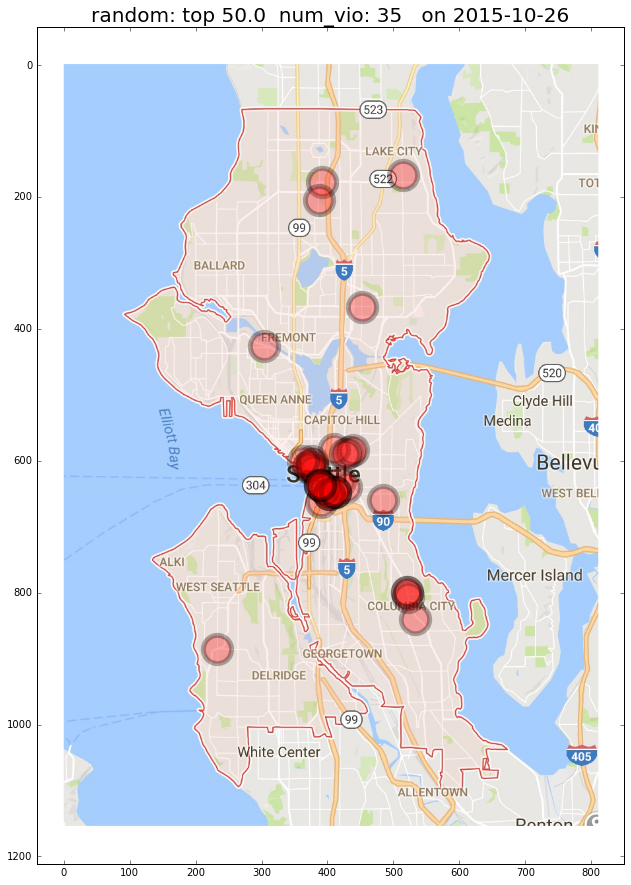

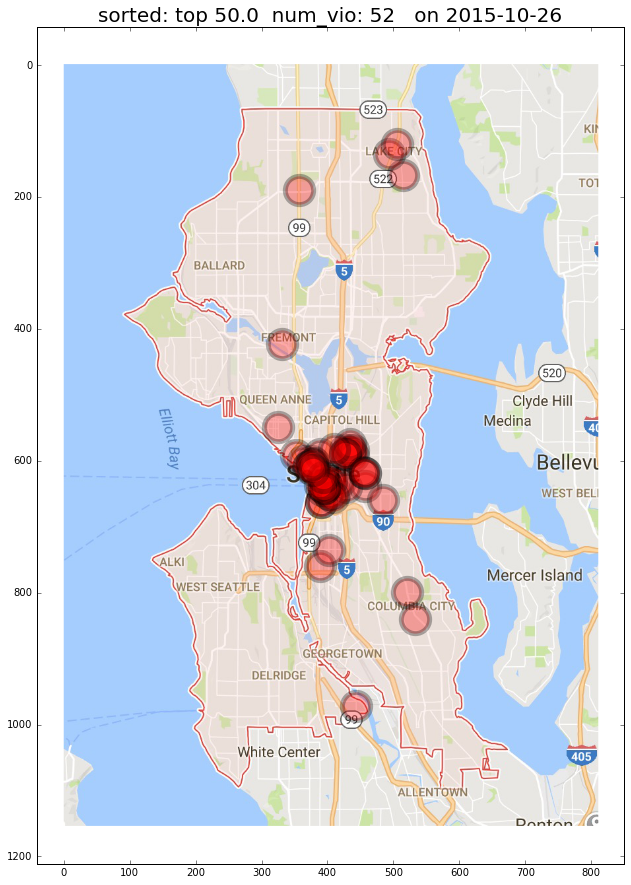

In [11]:
# select a day
datestr1 = '2015-10-26'
datestr2 = '2015-10-27'
datestr3 = '2015-10-28'
datestr4 = '2015-10-29'
datestr5 = '2015-10-30'
datestr6 = '2015-10-31'
datestr7 = '2015-11-01'

selected_day = seattle911[(seattle911['date'] == datestr1)
                          | (seattle911['date'] == datestr2)
                          | (seattle911['date'] == datestr3)
                          | (seattle911['date'] == datestr4)
                          | (seattle911['date'] == datestr5)
                          | (seattle911['date'] == datestr6)
                          | (seattle911['date'] == datestr7)]

#___random_____
random = selected_day
cutoff = .5
[rrow, rcol] = random.shape
randomindex = np.floor((np.random.rand(1,int(rrow*cutoff)) * rrow)).tolist()[0]
random = random.iloc[randomindex,:]
random = luckyrandom # save 'good' random

vrandom = random[random['Violent'] == 1]
rvlon = vrandom['Longitude'].tolist()
rvlat = vrandom['Latitude'].tolist()
rvlon, rvlat = coord2px(rvlon, rvlat)
random_num_violent = vrandom.Violent.sum()

nrandom = random[random['Violent'] == 0]
rnlon = nrandom['Longitude'].tolist()
rnlat = nrandom['Latitude'].tolist()
rnlon, rnlat = coord2px(rnlon, rnlat)

img = mpimg.imread('map.jpg')
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.imshow(img)
ax.scatter(rvlon, rvlat, alpha= .3, s = 800, c = 'r', marker = 'o', linewidth = 5)
#ax.scatter(rnlon, rnlat, alpha= .7, s = 100, c = 'g')
ax.set_title('random: top ' + str(cutoff*100) + '  num_vio: '+ str(random_num_violent) + '   on ' + datestr1, fontsize = 20)


#___sorted____
gb_sorted = selected_day.sort_values('PredictedProb', ascending=False)
cutoff = .5
[srow, scol] = gb_sorted.shape
gb_sorted = gb_sorted.iloc[0:int(srow*cutoff),:]

vsorted = gb_sorted[gb_sorted['Violent'] == 1]
svlon = vsorted['Longitude'].tolist()
svlat = vsorted['Latitude'].tolist()
svlon, svlat = coord2px(svlon, svlat)
sorted_num_violent = gb_sorted.Violent.sum()


nsorted = gb_sorted[gb_sorted['Violent'] == 0]
snlon = nsorted['Longitude'].tolist()
snlat = nsorted['Latitude'].tolist()
snlon, snlat = coord2px(snlon, snlat)

img = mpimg.imread('map.jpg')
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.imshow(img)
ax.scatter(svlon, svlat, alpha= .3, s = 800, c = 'r', marker = 'o', linewidth = 5)
#ax.scatter(snlon, snlat, alpha= .7, s = 100, c = 'g')
ax.set_title('sorted: top ' + str(cutoff*100)+ '  num_vio: '+ str(sorted_num_violent) + '   on ' + datestr1, fontsize = 20)

In [12]:
selected_day.Violent.sum()

70

In [13]:
selected_day.shape

(2113, 26)

In [164]:
luckyrandom = random

In [177]:
with open('lucky.pkl', 'w') as f:
    pickle.dump(luckyrandom, f)